In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, chi2_contingency


## Go to the /users/pgrad/mamu/Documents/first/ directory 


In [3]:
# Go to the /users/pgrad/mamu/Documents/first/ directory 
import os
os.chdir('/users/pgrad/mamu/Documents/first/')

## Load datasets


In [4]:
# Load datasets
original_data = pd.read_csv('./datasets/data.csv')
generated_data = pd.read_csv('./mistral-7b/results/synthetic_data_mistral-7b.csv')


## Feature Engineering

In [5]:
# Print the length of the datasets
print('Original data length:', len(original_data))
print('Generated data length:', len(generated_data))

# Subset the datasets to the minimum length
min_len = min(len(original_data), len(generated_data))
original_data = original_data.iloc[:min_len]
generated_data = generated_data.iloc[:min_len]

Original data length: 348
Generated data length: 0


In [6]:
# List of possible values for the categorical column ' Disease' from both datasets
original_disease_values = original_data['Disease'].unique()
generated_disease_values = generated_data['Disease'].unique()

# Print the list of possible values for the categorical column ' Disease' from both datasets
print('Original Disease Values:', original_disease_values)
print('Generated Disease Values:', generated_disease_values)

Original Disease Values: []
Generated Disease Values: []


In [7]:
# import the categories dictionary from json
import json

with open('./evaluation/tools/categories.json') as f:
    categories = json.load(f)
    
# Initialize the category counts
categories_count = {
    "Respiratory Diseases": 0,
    "Skin Diseases": 0,
    "Endocrine and Metabolic Diseases": 0,
    "Mental and Behavioral Disorders": 0,
    "Cardiovascular Diseases": 0,
    "Gastrointestinal Diseases": 0,
    "Cancers": 0,
    "Neurological Disorders": 0,
    "Musculoskeletal Diseases": 0,
    "Infectious Diseases": 0,
    "Urinary and Reproductive Diseases": 0,
    "Blood Disorders": 0,
    "Genetic Disorders": 0,
    "Miscellaneous": 0
}

# Function to classify diseases into categories and update counts
def classify_disease(disease):
    for category, diseases in categories.items():
        if disease in diseases:
            categories_count[category] += 1
            return category
    return 'Miscellaneous'


## Descriptive statistics comparison


#### Check if some of the diseases are new in the generated dataset


In [8]:
# Check if some of the diseases are new in the generated dataset
new_diseases = [disease for disease in generated_disease_values if disease not in original_disease_values]
print(f'New diseases in the generated dataset: \n {new_diseases}')

New diseases in the generated dataset: 
 []


In [9]:
# Create a new column 'Disease Category' in both datasets
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

### General description of both datasets

In [10]:
# Descriptive statistics comparison
print("Original Data Description:\n", original_data.describe())
print("Generated Data Description:\n", generated_data.describe())

# Descriptive statistics comparison for categorical columns
print("Original Data Description for Categorical Columns:\n", original_data.describe(include=['object']))
print("Generated Data Description for Categorical Columns:\n", generated_data.describe(include=['object']))


Original Data Description:
        Age
count  0.0
mean   NaN
std    NaN
min    NaN
25%    NaN
50%    NaN
75%    NaN
max    NaN
Generated Data Description:
        Disease Fever Cough Fatigue Difficulty Breathing  Age Gender  \
count        0     0     0       0                    0    0      0   
unique       0     0     0       0                    0    0      0   
top        NaN   NaN   NaN     NaN                  NaN  NaN    NaN   
freq       NaN   NaN   NaN     NaN                  NaN  NaN    NaN   

       Blood Pressure Cholesterol Level Outcome Variable Disease Category  
count               0                 0                0                0  
unique              0                 0                0                0  
top               NaN               NaN              NaN              NaN  
freq              NaN               NaN              NaN              NaN  
Original Data Description for Categorical Columns:
        Disease Fever Cough Fatigue Difficulty Breathing 

### Plot histograms

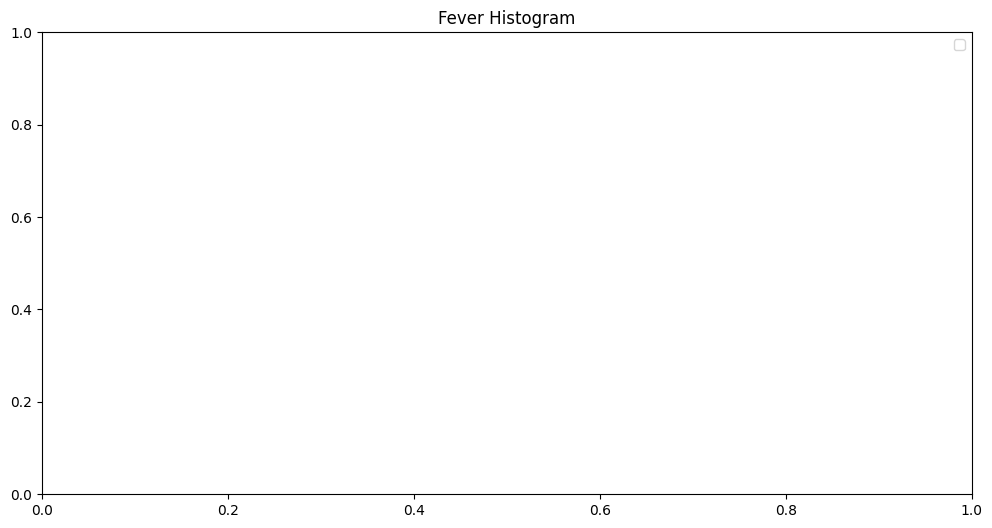

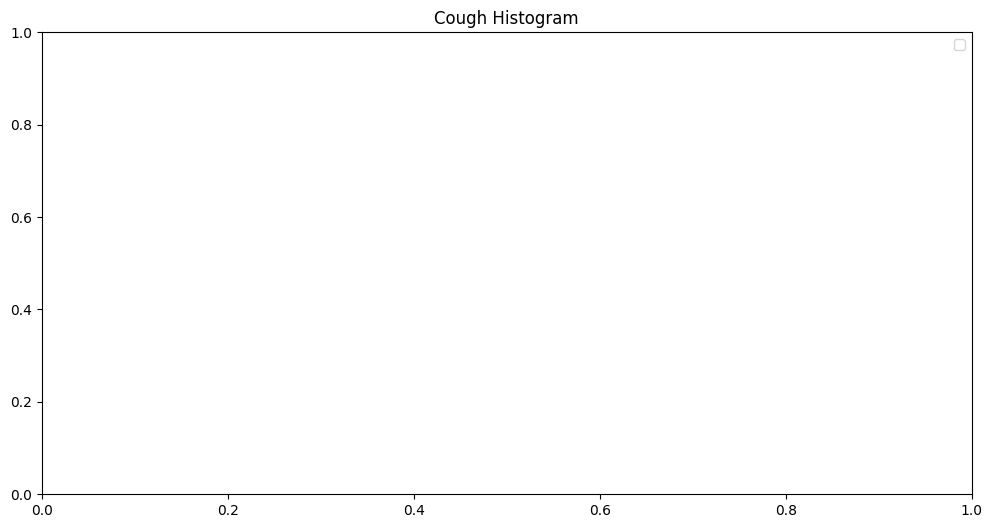

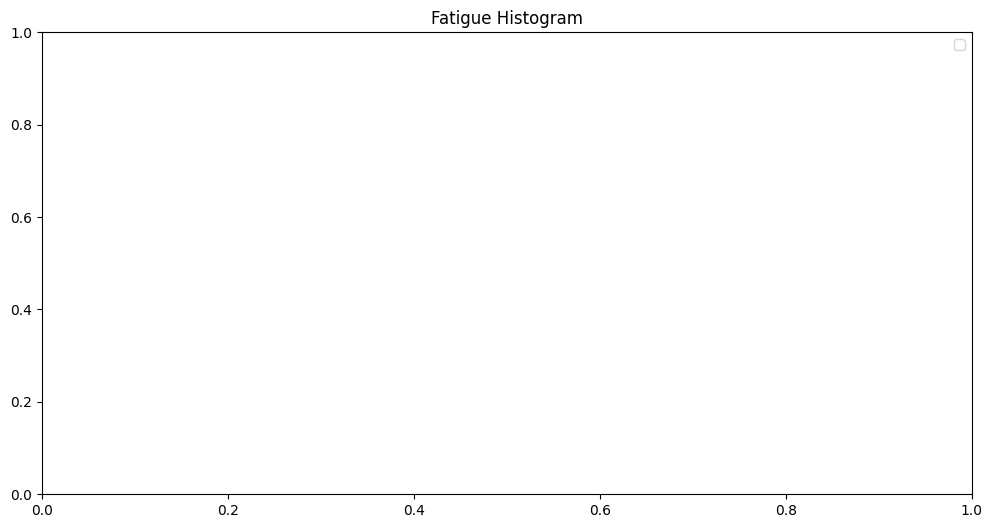

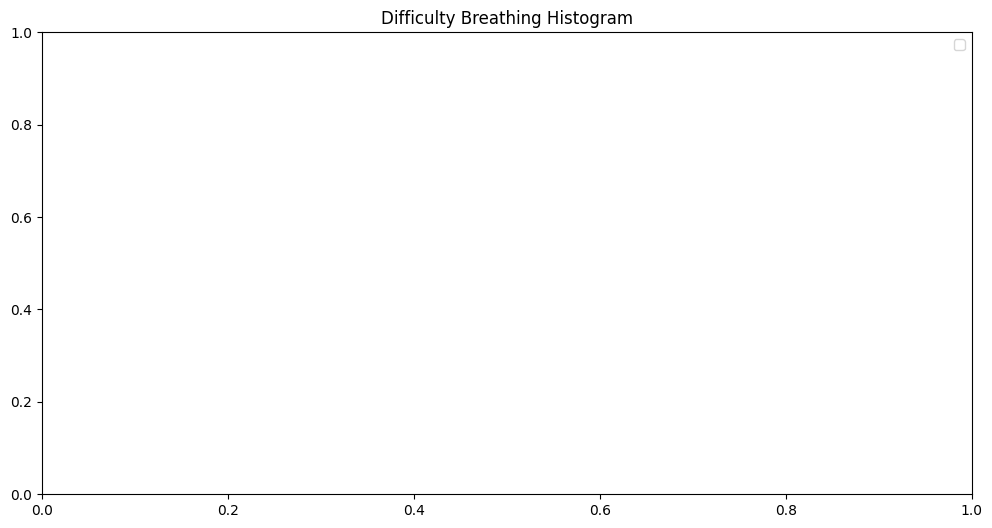

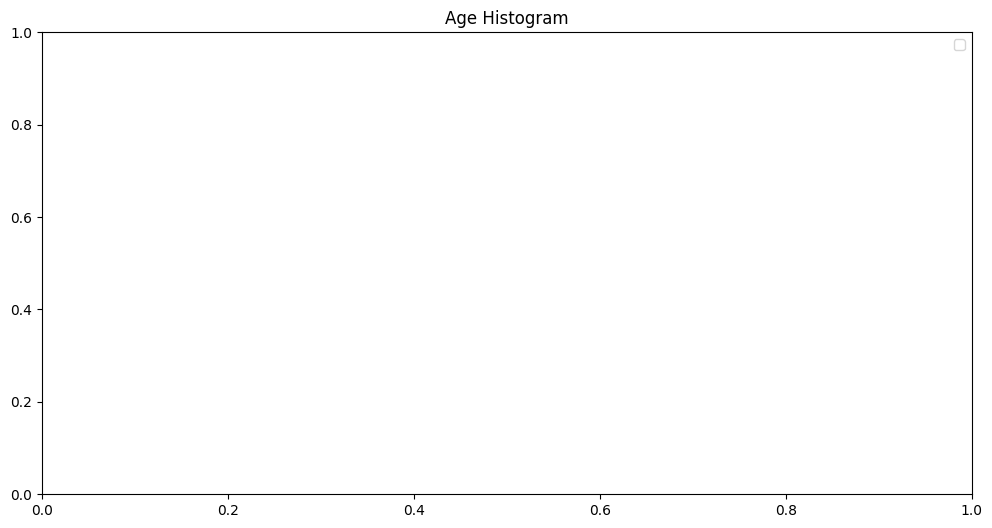

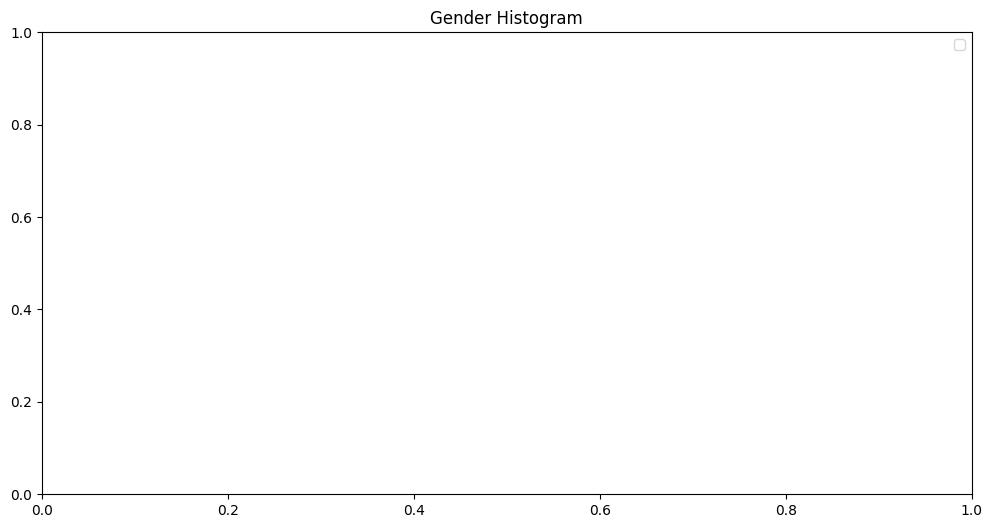

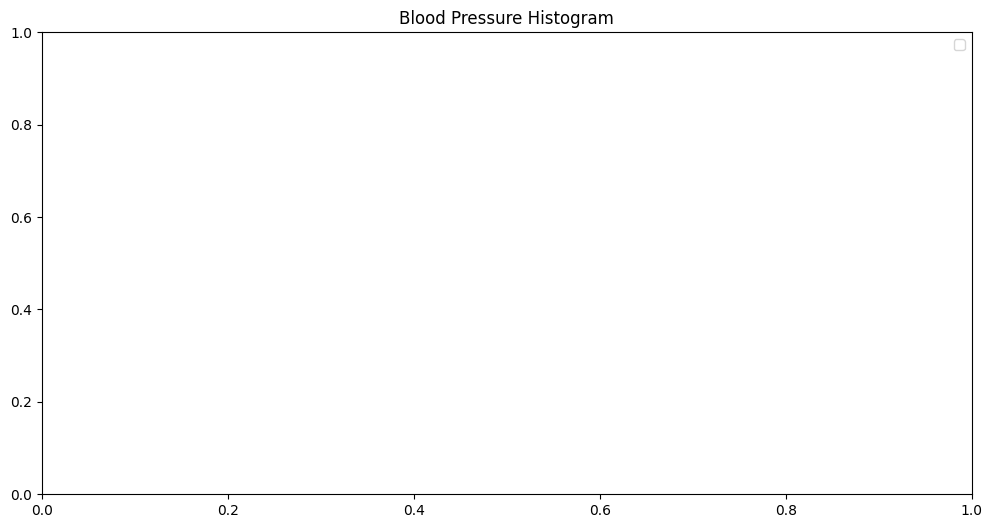

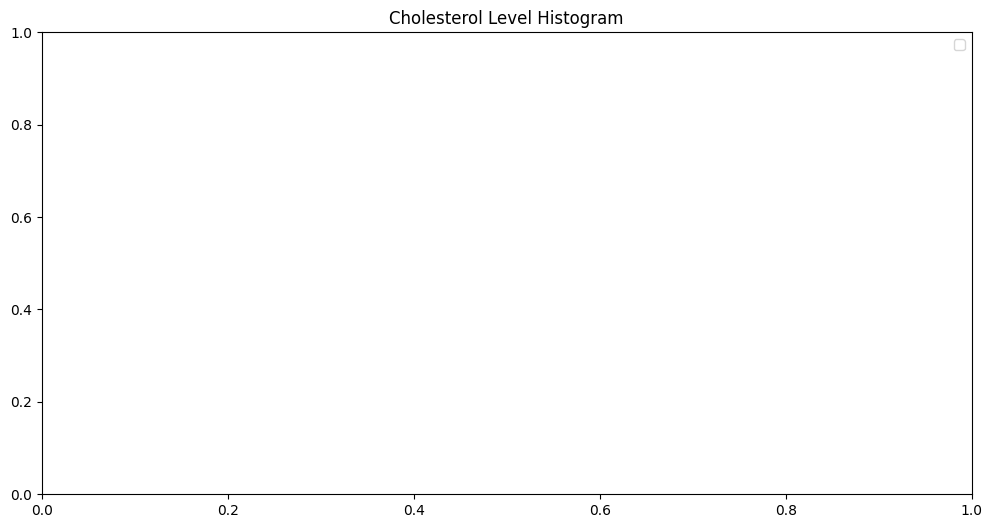

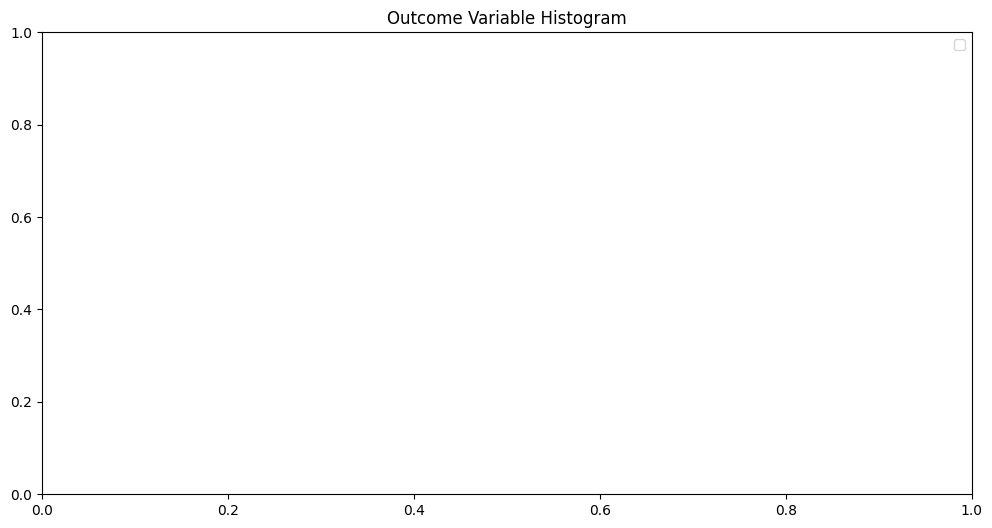

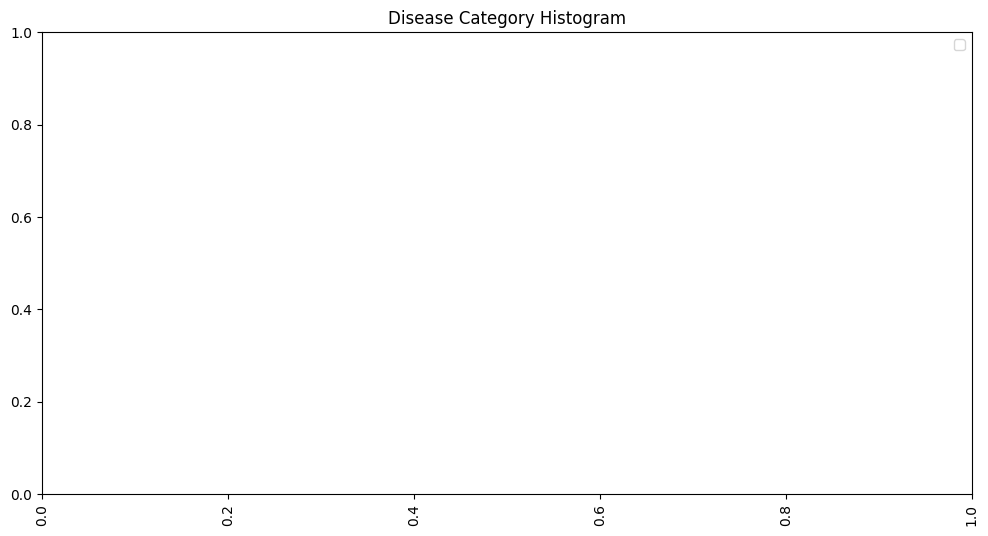

In [11]:
# Plot histograms
for col in original_data.columns:
    # Don't use the 'Disease' column for the histogram instead use the 'Disease Category' column
    if col == 'Disease':
        continue
    plt.figure(figsize=(12, 6))
    if col == 'Age':
        sns.histplot(original_data[col], color='blue', bins=50, kde=True)
        sns.histplot(generated_data[col], color='red', bins=50, kde=True)
    else:
        sns.histplot(original_data[col], color='blue', kde=False)
        sns.histplot(generated_data[col], color='red', kde=False)
    plt.title(f'{col} Histogram')
    plt.legend(['Original', 'Generated'])

    if col == 'Disease Category':
        plt.xticks(rotation=90)
    plt.show()


## Check if the distributions of the original and generated data are the same

In [12]:
# Check if the distributions of the original and generated data are the same
for col in original_data.columns:

    print(f'Feature: {col}')
    ks_stat, p_val = ks_2samp(original_data[col], generated_data[col])
    print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
    if p_val < 0.05:
        print(f'The distributions of the feature {col} are different')
    else:
        print(f'The distributions of the feature {col} are the same')
    print()

Feature: Disease


ValueError: Data passed to ks_2samp must not be empty

### TODO: Check again the code below

In [ ]:
# Categorical distribution comparison

# Create a new column 'Disease Category' in both datasets
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

# Check if the distributions of the original and generated data are the same
print('Disease Category Distribution Comparison:')
print(original_data['Disease Category'].value_counts())
print("\n")
print(generated_data['Disease Category'].value_counts())


Disease Category Distribution Comparison:
Disease Category
Respiratory Diseases                 64
Cardiovascular Diseases              33
Miscellaneous                        33
Musculoskeletal Diseases             31
Neurological Disorders               29
Gastrointestinal Diseases            28
Cancers                              27
Infectious Diseases                  27
Endocrine and Metabolic Diseases     26
Mental and Behavioral Disorders      16
Skin Diseases                        12
Urinary and Reproductive Diseases    11
Genetic Disorders                     8
Blood Disorders                       4
Name: count, dtype: int64


Disease Category
Respiratory Diseases                 128
Miscellaneous                         34
Gastrointestinal Diseases             28
Skin Diseases                         25
Endocrine and Metabolic Diseases      24
Neurological Disorders                21
Infectious Diseases                   20
Musculoskeletal Diseases              18
Mental a

KS Statistic: 0.20630372492836677, p-value: 6.500621957496857e-07
The distributions of the Disease Category are different
Chi-square Statistic: 192.84367446226028, p-value: 0.10091226457716554
The distributions of the Disease Category are the same


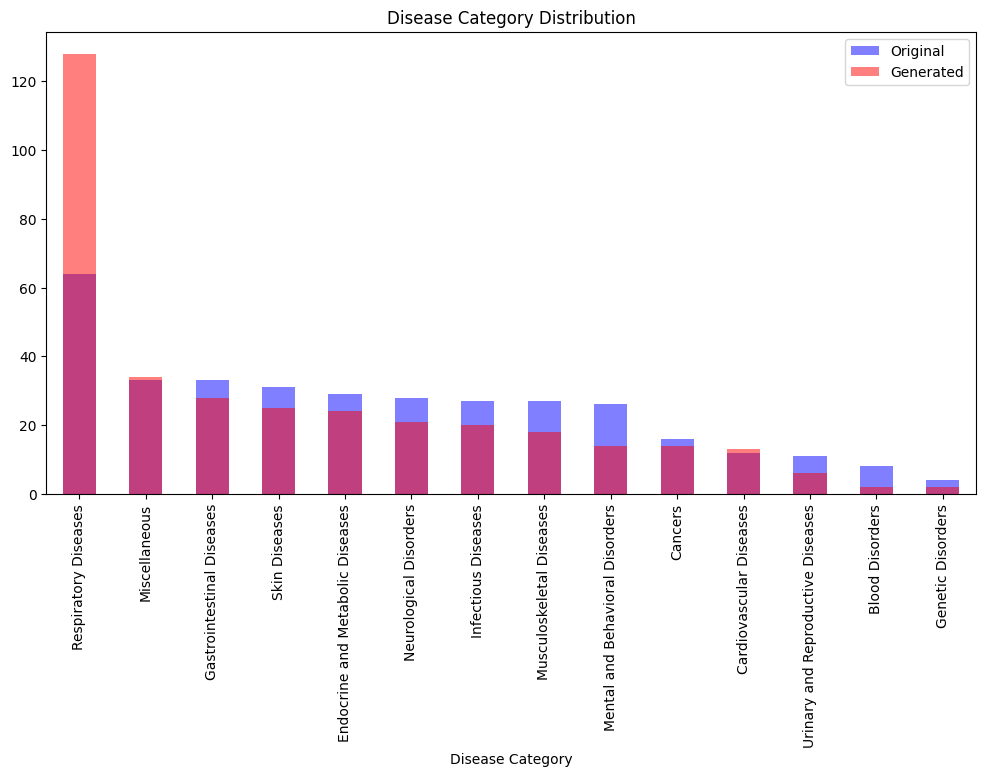

In [ ]:
# Kolmogorov-Smirnov test for categorical data
ks_stat, p_val = ks_2samp(original_data['Disease Category'], generated_data['Disease Category'])
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Chi-square test for categorical data
contingency_table = pd.crosstab(original_data['Disease Category'], generated_data['Disease Category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The distributions of the Disease Category are different')
else:
    print('The distributions of the Disease Category are the same')

# Plot the distribution of the Disease Category bars side by side
plt.figure(figsize=(12, 6))
original_data['Disease Category'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
generated_data['Disease Category'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.xticks(rotation=90)
plt.show()


## Correlation comparison


### One-hot encode the 'Disease Category' column


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])

### Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns


In [ ]:
# Calculate the cosine similarity between the one-hot encoded 'Disease Category' columns
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(original_encoded, generated_encoded)
print(f'Cosine Similarity: {cosine_sim.mean()}')

Cosine Similarity: 0.11371006806183857


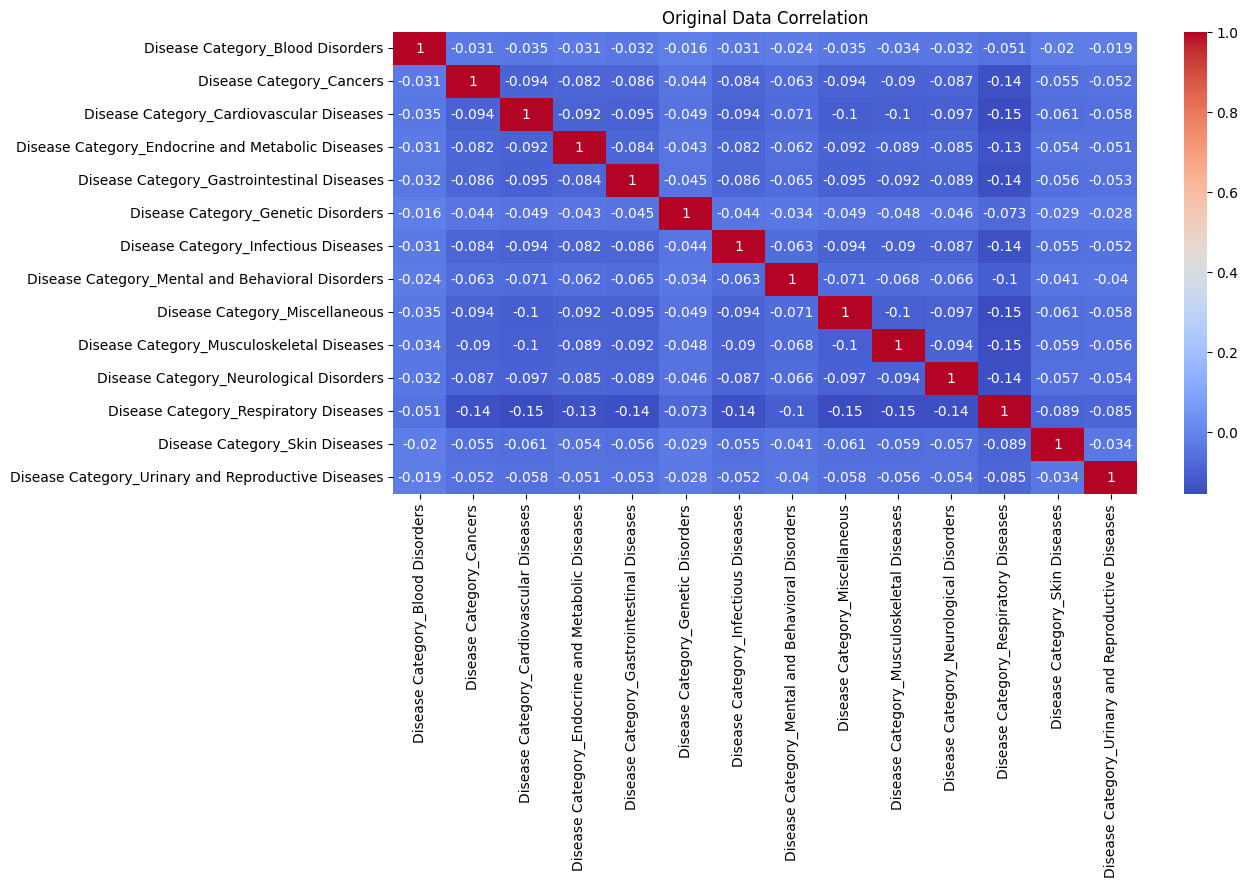

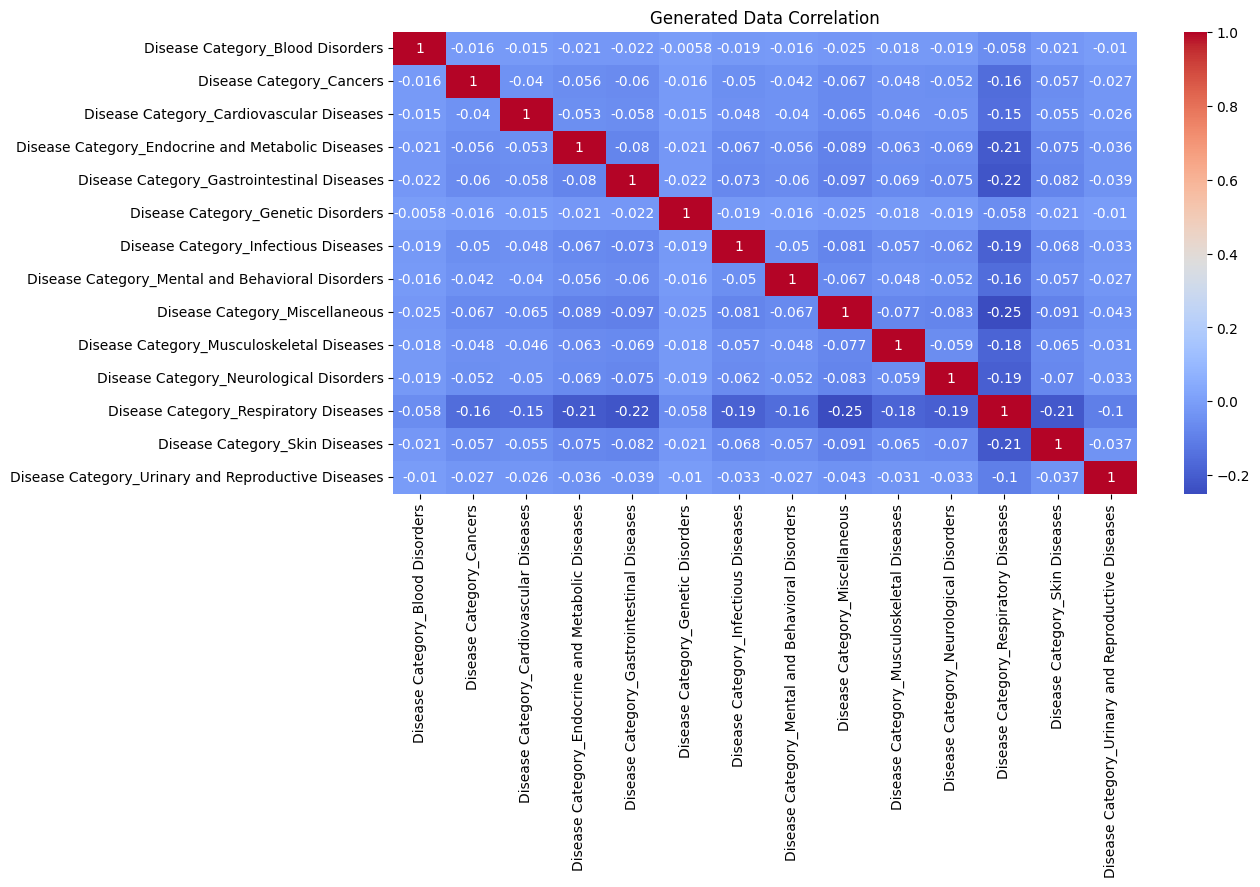

KS Statistic: 0.24489795918367346, p-value: 1.4353744160592419e-05
The correlation matrices are different
Chi-square Statistic: 89.4227524487581, p-value: 0.999999925216575
The correlation matrices are the same


In [ ]:
# Combine unique disease categories from both datasets
all_disease_categories = np.unique(np.concatenate((original_data['Disease Category'].unique(), generated_data['Disease Category'].unique())))

# One-hot encoding the combined disease categories
encoder = OneHotEncoder(categories=[all_disease_categories])
original_encoded = encoder.fit_transform(original_data[['Disease Category']]).toarray()
generated_encoded = encoder.transform(generated_data[['Disease Category']]).toarray()

# Creating DataFrames from the encoded data
original_encoded_df = pd.DataFrame(original_encoded, columns=encoder.get_feature_names_out(['Disease Category']))
generated_encoded_df = pd.DataFrame(generated_encoded, columns=encoder.get_feature_names_out(['Disease Category']))

# Calculate correlation matrices
original_corr = original_encoded_df.corr()
generated_corr = generated_encoded_df.corr()

# Plot correlation matrices
plt.figure(figsize=(12, 6))
sns.heatmap(original_corr, annot=True, cmap='coolwarm')
plt.title('Original Data Correlation')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(generated_corr, annot=True, cmap='coolwarm')
plt.title('Generated Data Correlation')
plt.show()

# Check if the correlation matrices are the same using KS test
ks_stat, p_val = ks_2samp(original_corr.values.flatten(), generated_corr.values.flatten())
print(f'KS Statistic: {ks_stat}, p-value: {p_val}')
if p_val < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

# Check if the correlation matrices are the same using Chi-square test
chi2, p, dof, expected = chi2_contingency(np.abs(original_corr.values))
print(f'Chi-square Statistic: {chi2}, p-value: {p}')
if p < 0.05:
    print('The correlation matrices are different')
else:
    print('The correlation matrices are the same')

### Count of diseases between the two datasets

Original Disease Counts: {'Respiratory Diseases': 576, 'Skin Diseases': 111, 'Endocrine and Metabolic Diseases': 150, 'Mental and Behavioral Disorders': 90, 'Cardiovascular Diseases': 138, 'Gastrointestinal Diseases': 168, 'Cancers': 123, 'Neurological Disorders': 150, 'Musculoskeletal Diseases': 147, 'Infectious Diseases': 141, 'Urinary and Reproductive Diseases': 51, 'Blood Disorders': 18, 'Genetic Disorders': 30, 'Miscellaneous': 30}


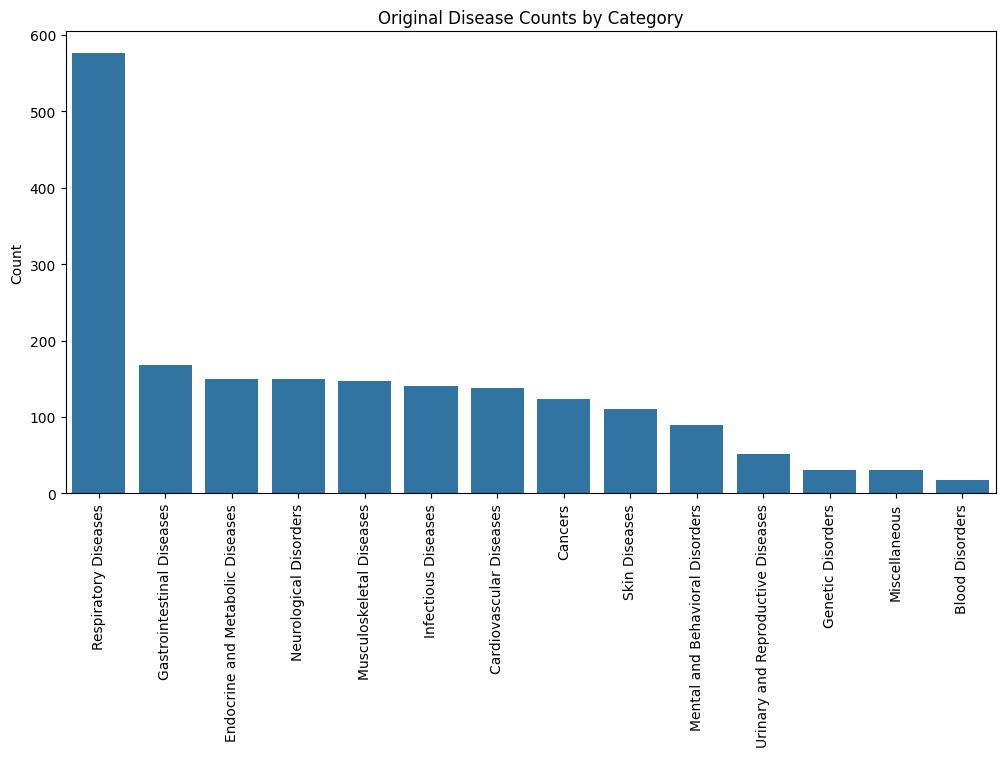

In [ ]:
# Classify the diseases in the original dataset
original_data['Disease Category'] = original_data['Disease'].apply(classify_disease)

# Classify the diseases in the generated dataset
generated_data['Disease Category'] = generated_data['Disease'].apply(classify_disease)

# Print the counts of diseases in each category
print('Original Disease Counts:', categories_count)

# Plot the counts of diseases in each category and order by number of counts
plt.figure(figsize=(12, 6))
sns.barplot(x=list(categories_count.keys()), y=list(categories_count.values()), order=sorted(categories_count, key=categories_count.get, reverse=True))
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Original Disease Counts by Category')
plt.show()


### Calculate the chi-square statistic and p-value for the disease categories


In [ ]:
# Calculate the chi-square statistic and p-value for the disease categories
chi2_stat, p_val, _, _ = chi2_contingency(
    pd.crosstab(original_data['Disease Category'], generated_data['Disease Category'])
)

# Print the chi-square statistic and p-value
print('Chi-Square Statistic:', chi2_stat)
print('P-Value:', p_val)

Chi-Square Statistic: 192.84367446226028
P-Value: 0.10091226457716554


### Calculate the Kolmogorov-Smirnov statistic and p-value for the disease categories


KS Statistic: 0.42857142857142855
P-Value: 0.15493471530488623


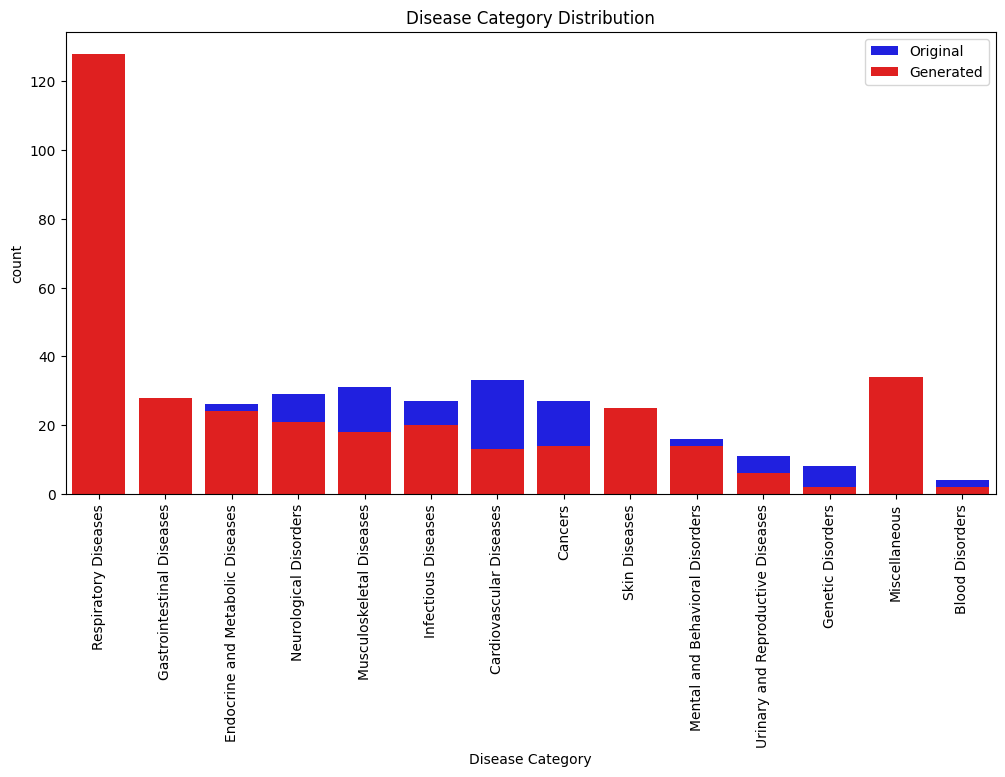

In [ ]:
# Calculate the Kolmogorov-Smirnov statistic and p-value for the disease categories

ks_stat, p_val = ks_2samp(
    original_data['Disease Category'].value_counts(normalize=True),
    generated_data['Disease Category'].value_counts(normalize=True)
)

# Print the Kolmogorov-Smirnov statistic and p-value
print('KS Statistic:', ks_stat)
print('P-Value:', p_val)

# Plot the distribution of disease categories in the original and generated datasets and order by number of counts
plt.figure(figsize=(12, 6))
sns.countplot(x='Disease Category', data=original_data, color='blue', order=sorted(categories_count, key=categories_count.get, reverse=True))
sns.countplot(x='Disease Category', data=generated_data, color='red', order=sorted(categories_count, key=categories_count.get, reverse=True))
plt.xticks(rotation=90)
plt.title('Disease Category Distribution')
plt.legend(['Original', 'Generated'])
plt.show()

# Dimensionality Reduction and Visualization


## T-SNE Visualisation

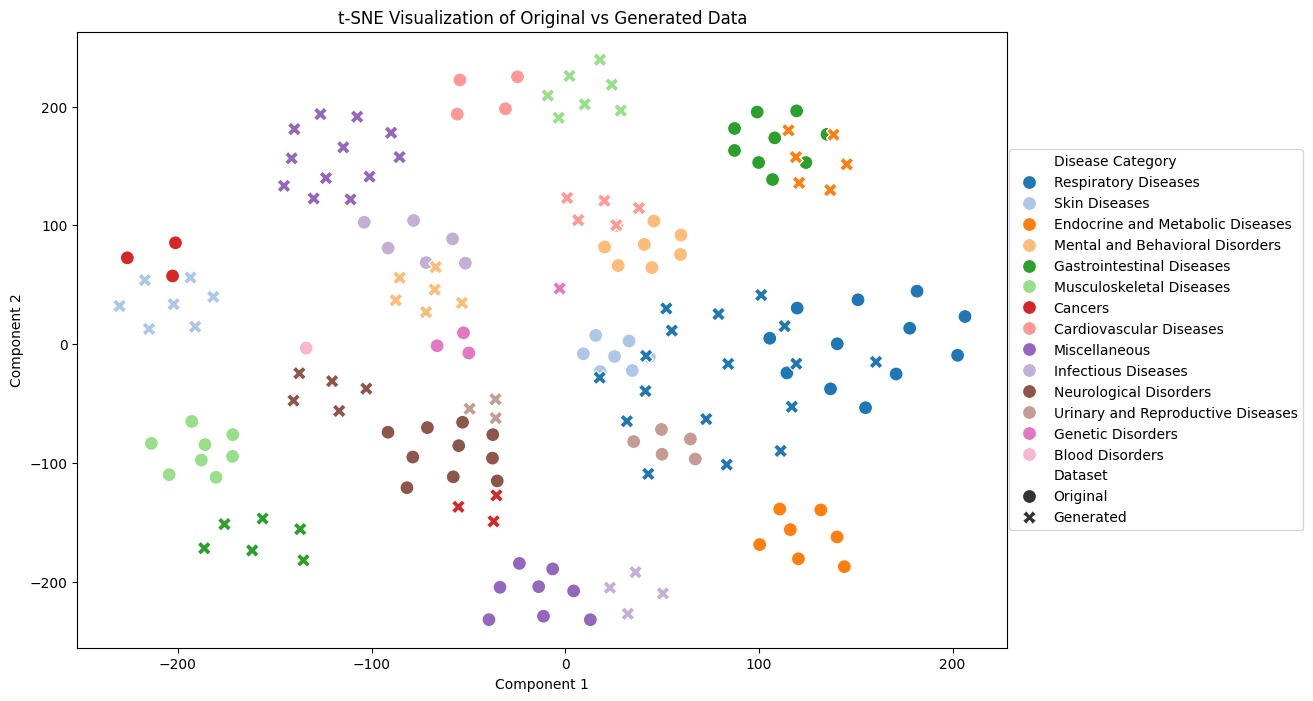

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder

# Assuming original_data and generated_data are your datasets

# One-hot encode the 'Disease Category' column
encoder = OneHotEncoder()
original_encoded = encoder.fit_transform(original_data[['Disease Category']])
generated_encoded = encoder.transform(generated_data[['Disease Category']])
original_encoded = original_encoded.toarray()
generated_encoded = generated_encoded.toarray()

# Perform t-SNE on the one-hot encoded data
tsne = TSNE(n_components=2, random_state=42)
original_tsne = tsne.fit_transform(original_encoded)
generated_tsne = tsne.fit_transform(generated_encoded)

# Create a combined DataFrame for easier plotting
import pandas as pd
original_df = pd.DataFrame(original_tsne, columns=['Component 1', 'Component 2'])
original_df['Dataset'] = 'Original'
original_df['Disease Category'] = original_data['Disease Category']

generated_df = pd.DataFrame(generated_tsne, columns=['Component 1', 'Component 2'])
generated_df['Dataset'] = 'Generated'
generated_df['Disease Category'] = generated_data['Disease Category']

combined_df = pd.concat([original_df, generated_df])

# Plot the t-SNE visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Disease Category', style='Dataset', palette='tab20', data=combined_df, markers=True, s=100)
plt.title('t-SNE Visualization of Original vs Generated Data')
# make the legend smaller
plt.legend(loc='center', bbox_to_anchor=(1.16, 0.5), ncol=1)
plt.show()


## PCA

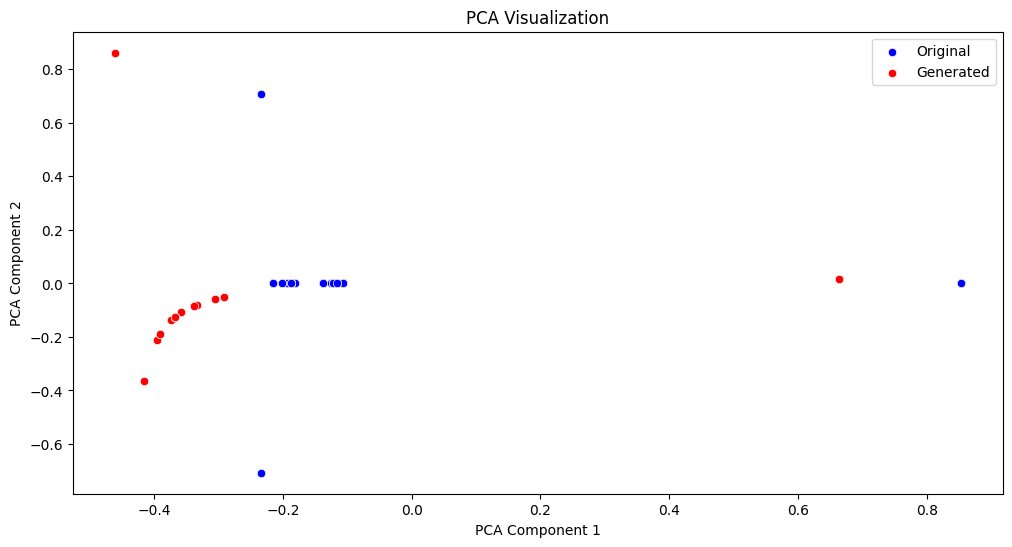

In [ ]:
# Principal Component Analysis (PCA) Visualisation
from sklearn.decomposition import PCA

# Perform PCA on the one-hot encoded data
pca = PCA(n_components=2)
original_pca = pca.fit_transform(original_encoded)
generated_pca = pca.fit_transform(generated_encoded)

# Plot the PCA visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(x=original_pca[:, 0], y=original_pca[:, 1], color='blue')
sns.scatterplot(x=generated_pca[:, 0], y=generated_pca[:, 1], color='red')
plt.title('PCA Visualization')
plt.legend(['Original', 'Generated'])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

